## **Import Libraries**

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.preprocessing import LabelEncoder , MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score , mean_squared_error

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

import warnings
warnings.filterwarnings('ignore')

2024-02-04 15:23:32.119551: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-04 15:23:32.119660: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-04 15:23:32.239167: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


## **EDA**

In [2]:
df = pd.read_csv('/kaggle/input/ann-car-sales-price-prediction/car_purchasing.csv' ,encoding='ISO-8859-1')
df.head()

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer name        500 non-null    object 
 1   customer e-mail      500 non-null    object 
 2   country              500 non-null    object 
 3   gender               500 non-null    int64  
 4   age                  500 non-null    float64
 5   annual Salary        500 non-null    float64
 6   credit card debt     500 non-null    float64
 7   net worth            500 non-null    float64
 8   car purchase amount  500 non-null    float64
dtypes: float64(5), int64(1), object(3)
memory usage: 35.3+ KB


### No missing values

In [4]:
df.describe()

,gender,age,annual Salary,credit card debt,net worth,car purchase amount
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.506000,46.241674,62127.239608,9607.645049,431475.713625,44209.799218
std,0.500465,7.978862,11703.378228,3489.187973,173536.756340,10773.178744
min,0.000000,20.000000,20000.000000,100.000000,20000.000000,9000.000000
25%,0.000000,40.949969,54391.977195,7397.515792,299824.195900,37629.896040
50%,1.000000,46.049901,62915.497035,9655.035568,426750.120650,43997.783390
75%,1.000000,51.612263,70117.862005,11798.867487,557324.478725,51254.709517
max,1.000000,70.000000,100000.000000,20000.000000,1000000.000000,80000.000000


## **Removing Outliers**

In [5]:
country = df['country'].value_counts()
country

country
Mauritania                                      6
Bolivia                                         6
Israel                                          6
Kyrgyzstan                                      5
Laos                                            5
                                               ..
Australia                                       1
Montenegro                                      1
Saint Helena, Ascension and Tristan da Cunha    1
Malaysia                                        1
marlal                                          1
Name: count, Length: 211, dtype: int64

In [6]:
gender = df['gender'].value_counts()
gender

gender
1    253
0    247
Name: count, dtype: int64

In [7]:
fig = px.pie(values=gender,
            names= gender.index,
            template='plotly_dark',
            title= 'Distribution of gender in the dataset')
fig.show()

In [8]:
age = df['age'].value_counts()
age

age
46.731152    1
41.851720    1
40.870623    1
43.152897    1
58.271369    1
            ..
47.022284    1
39.942995    1
52.577441    1
28.009676    1
55.630317    1
Name: count, Length: 500, dtype: int64

In [9]:
df['age'].describe()

count    500.000000
mean      46.241674
std        7.978862
min       20.000000
25%       40.949969
50%       46.049901
75%       51.612263
max       70.000000
Name: age, dtype: float64

In [10]:
fig = px.box(df['age'],
             title='quartiles of the age column',
             template='plotly_dark'
            )
fig.show()

In [11]:
# removing outliers
q1 = df['age'].quantile(0.25)
q3 = df['age'].quantile(0.75)
iqr = q3 - q1
top_range = q3 + iqr * 1.5
bottom_range = q1 - iqr * 1.5
for i in df.index:
    if df.loc[i, 'age'] > top_range:
        df.loc[i, 'age'] = top_range
    if df.loc[i, 'age'] < bottom_range:
        df.loc[i, 'age'] = bottom_range
fig = px.box(df['age'],
             title='Box after cleaning',
             template='plotly_dark'
            )
fig.show()

In [12]:
annual_Salary = df['annual Salary'].value_counts()
annual_Salary

annual Salary
61370.67766    1
62812.09301    1
66646.89292    1
53798.55112    1
79370.03798    1
              ..
52027.63837    1
69612.01230    1
53065.57175    1
82842.53385    1
61388.62709    1
Name: count, Length: 500, dtype: int64

In [13]:
df['annual Salary'].describe()

count       500.000000
mean      62127.239608
std       11703.378228
min       20000.000000
25%       54391.977195
50%       62915.497035
75%       70117.862005
max      100000.000000
Name: annual Salary, dtype: float64

In [14]:
fig = px.box(df['annual Salary'],
             title='quartiles of the annual Salary column',
             template='plotly_dark'
            )
fig.show()

In [15]:
# removing outliers
q1 = df['annual Salary'].quantile(0.25)
q3 = df['annual Salary'].quantile(0.75)
iqr = q3 - q1
top_range = q3 + iqr * 1.5
bottom_range = q1 - iqr * 1.5
for i in df.index:
    if df.loc[i, 'annual Salary'] > top_range:
        df.loc[i, 'annual Salary'] = top_range
    if df.loc[i, 'annual Salary'] < bottom_range:
        df.loc[i, 'annual Salary'] = bottom_range
fig = px.box(df['annual Salary'],
             title='Box after cleaning',
             template='plotly_dark'
            )
fig.show()

In [16]:
credit_card_debt = df['credit card debt'].value_counts()
credit_card_debt

credit card debt
9391.341628     1
11609.380910    1
9572.957136     1
11160.355060    1
14426.164850    1
               ..
11960.853770    1
8125.598993     1
17805.576070    1
13102.158050    1
14270.007310    1
Name: count, Length: 500, dtype: int64

In [17]:
df['credit card debt'].describe()

count      500.000000
mean      9607.645049
std       3489.187973
min        100.000000
25%       7397.515792
50%       9655.035568
75%      11798.867487
max      20000.000000
Name: credit card debt, dtype: float64

In [18]:
fig = px.box(df['credit card debt'],
             title='quartiles of the credit card debt column',
             template='plotly_dark'
            )
fig.show()

In [19]:
# removing outliers
q1 = df['credit card debt'].quantile(0.25)
q3 = df['credit card debt'].quantile(0.75)
iqr = q3 - q1
top_range = q3 + iqr * 1.5
bottom_range = q1 - iqr * 1.5
for i in df.index:
    if df.loc[i, 'credit card debt'] > top_range:
        df.loc[i, 'credit card debt'] = top_range
    if df.loc[i, 'credit card debt'] < bottom_range:
        df.loc[i, 'credit card debt'] = bottom_range
fig = px.box(df['credit card debt'],
             title='Box after cleaning',
             template='plotly_dark'
            )
fig.show()

In [20]:
net_worth = df['net worth'].value_counts()
net_worth

net worth
462946.4924    1
238961.2505    1
530973.9078    1
638467.1773    1
548599.0524    1
              ..
688466.0503    1
499086.3442    1
429440.3297    1
315775.3207    1
341691.9337    1
Name: count, Length: 500, dtype: int64

In [21]:
df['net worth'].describe()

count        500.000000
mean      431475.713625
std       173536.756340
min        20000.000000
25%       299824.195900
50%       426750.120650
75%       557324.478725
max      1000000.000000
Name: net worth, dtype: float64

In [22]:
fig = px.box(df['net worth'],
             title='quartiles of the net worth column',
             template='plotly_dark'
            )
fig.show()

In [23]:
# removing outliers
q1 = df['net worth'].quantile(0.25)
q3 = df['net worth'].quantile(0.75)
iqr = q3 - q1
top_range = q3 + iqr * 1.5
bottom_range = q1 - iqr * 1.5
for i in df.index:
    if df.loc[i, 'net worth'] > top_range:
        df.loc[i, 'net worth'] = top_range
    if df.loc[i, 'net worth'] < bottom_range:
        df.loc[i, 'net worth'] = bottom_range
fig = px.box(df['net worth'],
             title='Box after cleaning',
             template='plotly_dark'
            )
fig.show()

In [24]:
car_purchase_amount = df['car purchase amount'].value_counts()
car_purchase_amount

car purchase amount
45107.22566    1
35321.45877    1
45115.52566    1
42925.70921    1
67422.36313    1
              ..
46635.49432    1
45078.40193    1
44387.58412    1
37161.55393    1
49091.97185    1
Name: count, Length: 500, dtype: int64

In [25]:
df['car purchase amount'].describe()

count      500.000000
mean     44209.799218
std      10773.178744
min       9000.000000
25%      37629.896040
50%      43997.783390
75%      51254.709517
max      80000.000000
Name: car purchase amount, dtype: float64

In [26]:
fig = px.box(df['car purchase amount'],
             title='quartiles of the car purchase amount column',
             template='plotly_dark'
            )
fig.show()

In [27]:
# removing outliers
q1 = df['car purchase amount'].quantile(0.25)
q3 = df['car purchase amount'].quantile(0.75)
iqr = q3 - q1
top_range = q3 + iqr * 1.5
bottom_range = q1 - iqr * 1.5
for i in df.index:
    if df.loc[i, 'car purchase amount'] > top_range:
        df.loc[i, 'car purchase amount'] = top_range
    if df.loc[i, 'car purchase amount'] < bottom_range:
        df.loc[i, 'car purchase amount'] = bottom_range
fig = px.box(df['car purchase amount'],
             title='Box after cleaning',
             template='plotly_dark'
            )
fig.show()

## **Preprocessing**

### We can drop customer name & customer e-mail columns as they don't affect the sale price predication

### Country column we can say that this country economy is good or bad so it can affect the car sales within the customer

In [28]:
df.drop(columns=['customer name', 'customer e-mail'] , inplace= True)
df.head()

,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


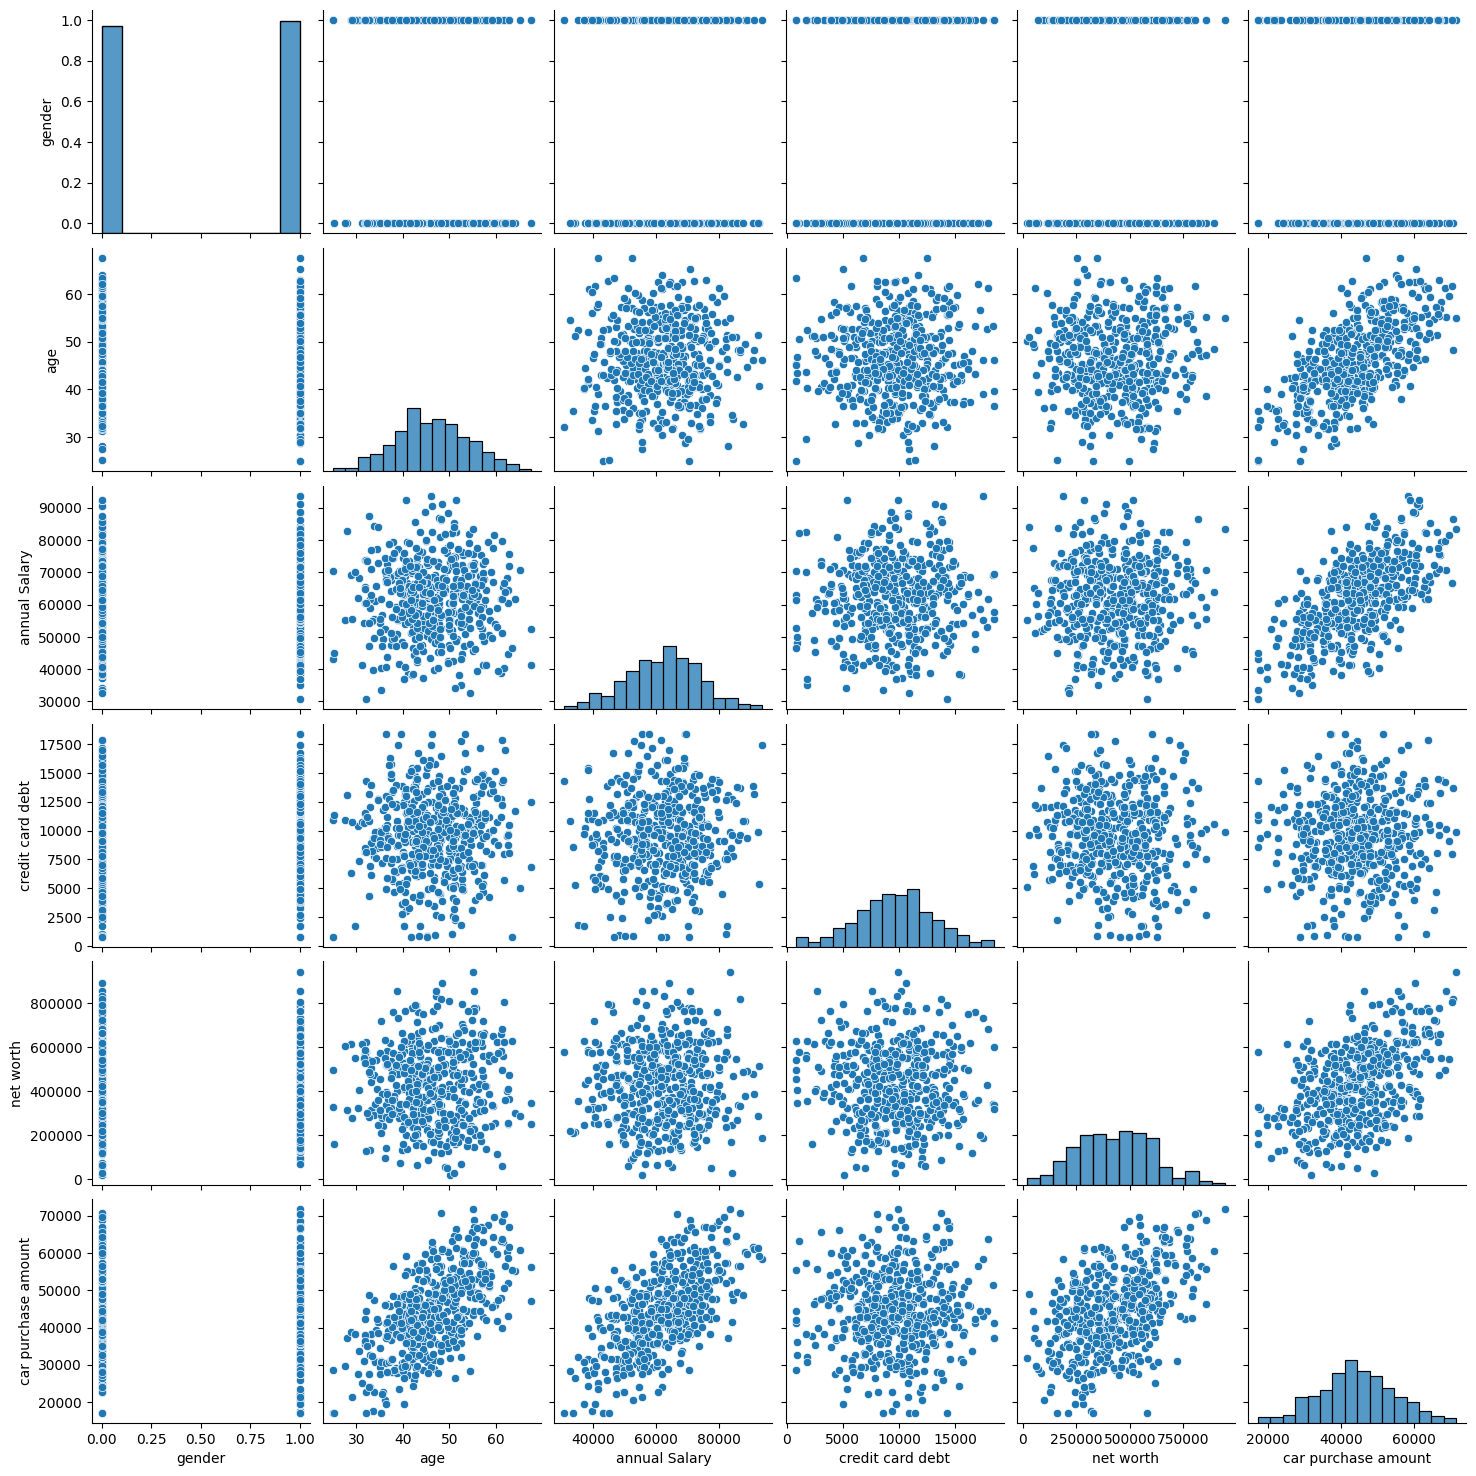

In [29]:
sns.pairplot(df)

In [30]:
encoder = LabelEncoder()
df['country'] = encoder.fit_transform(df['country'])
df.head()

,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,27,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,17,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,1,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,41,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,26,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [31]:
X = df.drop(columns=['car purchase amount'])
y = df['car purchase amount']

In [32]:
y = y.values.reshape(-1,1)    # to make the y 2D as X
y.shape

(500, 1)

In [33]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
y = scaler.fit_transform(y)

In [34]:
X_train , X_test , y_train , y_test = train_test_split(X, y , shuffle=True , random_state=42 , test_size=0.1)

In [35]:
X_train.shape

(450, 6)

## **Model Structure**

In [36]:
model = Sequential([
    Dense(10, activation='relu', input_dim=6),
    Dense(15, activation='relu'),
    Dense(1 , activation='linear')
])
model.compile(optimizer='adam' , loss= 'mean_squared_error')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                70        
                                                                 
 dense_1 (Dense)             (None, 15)                165       
                                                                 
 dense_2 (Dense)             (None, 1)                 16        
                                                                 
Total params: 251 (1004.00 Byte)
Trainable params: 251 (1004.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [37]:
history = model.fit(X_train , y_train , epochs=250, validation_split=0.2)

Epoch 1/250


I0000 00:00:1707060239.191775      72 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


12/12 [==============================] - 2s 19ms/step - loss: 0.2807 - val_loss: 0.2060
Epoch 2/250
12/12 [==============================] - 0s 5ms/step - loss: 0.1703 - val_loss: 0.1180
Epoch 3/250
12/12 [==============================] - 0s 5ms/step - loss: 0.0975 - val_loss: 0.0663
Epoch 4/250
12/12 [==============================] - 0s 5ms/step - loss: 0.0585 - val_loss: 0.0451
Epoch 5/250
12/12 [==============================] - 0s 5ms/step - loss: 0.0435 - val_loss: 0.0380
Epoch 6/250
12/12 [==============================] - 0s 5ms/step - loss: 0.0382 - val_loss: 0.0336
Epoch 7/250
12/12 [==============================] - 0s 5ms/step - loss: 0.0338 - val_loss: 0.0287
Epoch 8/250
12/12 [==============================] - 0s 5ms/step - loss: 0.0303 - val_loss: 0.0248
Epoch 9/250
12/12 [==============================] - 0s 5ms/step - loss: 0.0274 - val_loss: 0.0224
Epoch 10/250
12/12 [==============================] - 0s 5ms/step - loss: 0.0252 - val_loss: 0.0205
Epoch 11/250
12/12 [

## **Evaluation**

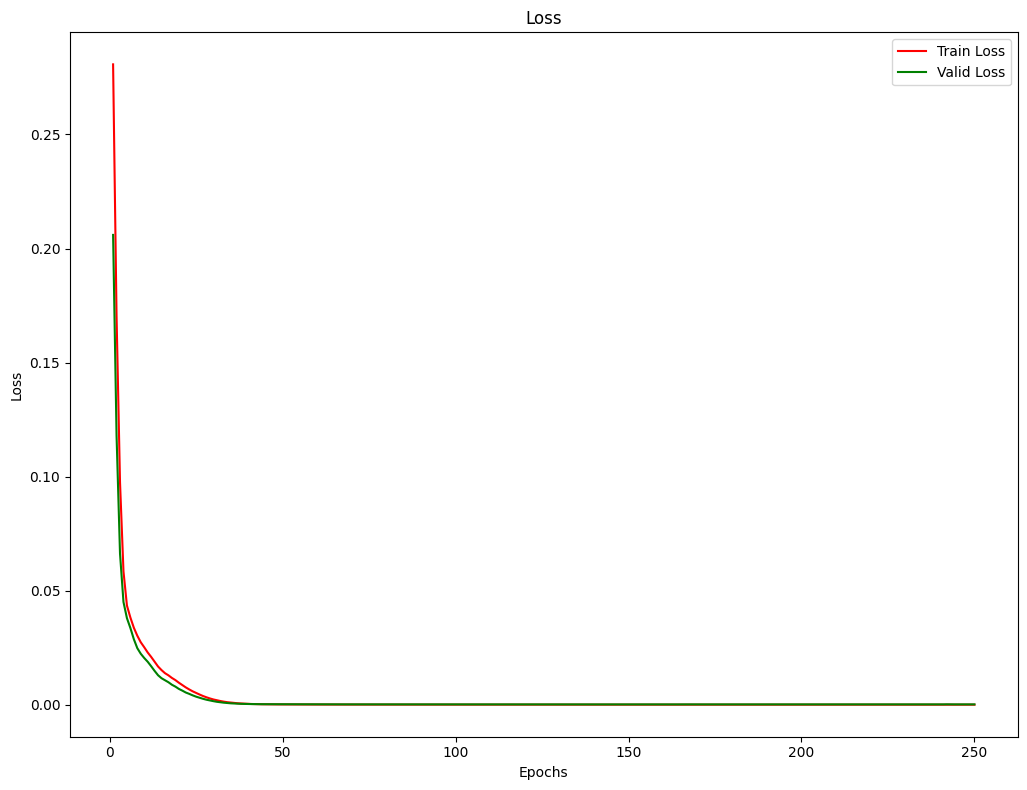

In [38]:
tr_loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = [i+1 for i in range(len(tr_loss))]

plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs, tr_loss, 'r', label='Train Loss')
plt.plot(epochs, val_loss, 'g', label='Valid Loss')
plt.title('Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.tight_layout()
plt.show()

## **Prediction**

In [39]:
y_predict = model.predict(X_test)

2/2 [==============================] - 0s 3ms/step


In [40]:
mean_squared_error(y_test, y_predict)

2.640724721938318e-05

In [41]:
r2_score(y_test , y_predict)

0.9992340098192108